## SARS-2 Austria 

C. Möstl, Graz, https://twitter.com/chrisoutofspace

data source for Austria
https://www.sozialministerium.at/Informationen-zum-Coronavirus/Neuartiges-Coronavirus-(2019-nCov).html

data source for South Korea
https://www.worldometers.info/coronavirus/country/south-korea/


In [77]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sunpy.time import parse_time
import datetime


def expon(x, a, k, b):
    return a*np.exp(k*x) + b


sns.set_style('darkgrid')
sns.set_context('paper')   

### Austria

In [121]:
t_start=parse_time('2020-02-25 23:00').datetime
t_end=parse_time('2020-03-19 23:00').datetime

dates=parse_time([t_start + datetime.timedelta(days=1*n) for n in range((t_end - t_start).days)]).datetime
cases=[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016,1332, 1471]

print(parse_time(dates).iso)
print(cases)

dates1=parse_time(dates).plot_date
dates1=dates1-dates1[0] 

param = scipy.optimize.curve_fit(expon, dates1, cases )

p1=param[0][0]
p2=param[0][1]
p3=param[0][2]

t_end2=parse_time('2020-04-01 12:00').datetime

dates_fut=parse_time([t_start + datetime.timedelta(days=n) for n in range((t_end2 - t_start).days)]).plot_date
dates_fut1=dates_fut-dates_fut[0]

fit=expon(dates_fut1,p1,p2,p3)
now=datetime.datetime.utcnow().strftime("%Y-%b-%d %H:%M")
#now=dates[-1].strftime("%Y-%b-%d %H:%M")



['2020-02-25 23:00:00.000' '2020-02-26 23:00:00.000'
 '2020-02-27 23:00:00.000' '2020-02-28 23:00:00.000'
 '2020-02-29 23:00:00.000' '2020-03-01 23:00:00.000'
 '2020-03-02 23:00:00.000' '2020-03-03 23:00:00.000'
 '2020-03-04 23:00:00.000' '2020-03-05 23:00:00.000'
 '2020-03-06 23:00:00.000' '2020-03-07 23:00:00.000'
 '2020-03-08 23:00:00.000' '2020-03-09 23:00:00.000'
 '2020-03-10 23:00:00.000' '2020-03-11 23:00:00.000'
 '2020-03-12 23:00:00.000' '2020-03-13 23:00:00.000'
 '2020-03-14 23:00:00.000' '2020-03-15 23:00:00.000'
 '2020-03-16 23:00:00.000' '2020-03-17 23:00:00.000'
 '2020-03-18 23:00:00.000']
[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016, 1332, 1471]


### South Korea

In [119]:
t_start_sk=parse_time('2020-02-24 20:00').datetime
t_end_sk=parse_time('2020-03-18 20:00').datetime

dates_sk=parse_time([t_start_sk + datetime.timedelta(days=1*n) for n in range((t_end_sk - t_start).days)]).datetime
cases_sk=[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016,1332, 1471]

current total cases Austria 1471


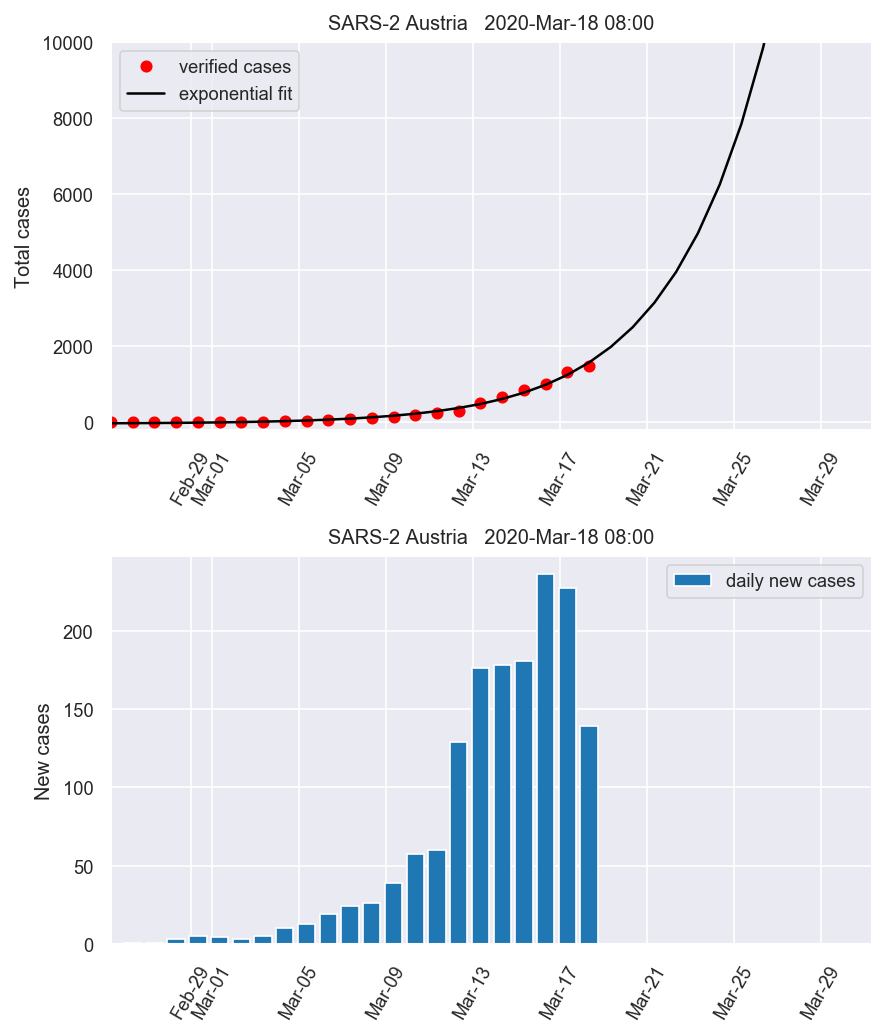

In [120]:
plt.figure(1,figsize=(6,7),dpi=150)
ax1 = plt.subplot(211) 

ax1.plot(dates,cases,'or',label='verified cases')
ax1.plot(dates_fut,fit,'-k',label='exponential fit')

ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_xlim([dates_fut[0],dates_fut[-1]])
plt.xticks(rotation=60)
plt.ylabel('Total cases')
plt.ylim(-200,10000)
plt.title('SARS-2 Austria   '+now)
plt.legend()


ax2 = plt.subplot(212) 

ax2.bar(dates,np.gradient(cases),label='daily new cases')
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )

plt.xticks(rotation=60)
plt.ylabel('New cases')
ax2.set_xlim([dates_fut[0],dates_fut[-1]])
plt.title('SARS-2 Austria   '+now)
plt.legend()

plt.tight_layout()
print('current total cases Austria',cases[-1])